In [17]:
%matplotlib inline

from fastai.learner import *

In [18]:
def linear(w,b,x):
    return w*x+b

In [19]:
def mse(pred, actual):
    return ((pred-actual)**2).mean()

def mse_loss(w,b,x,y):
    return mse(linear(w,b,x),y)

In [20]:
def fake_data_generator(n, w, b):
    x = np.random.uniform(0,10,n)
    y = linear(w,b,x)+0.3*np.random.normal(0,1,n)
    return x,y

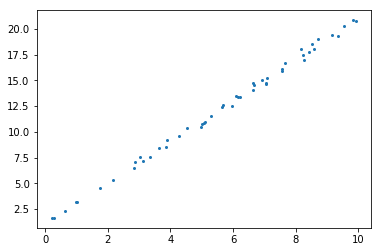

In [21]:
x,y = fake_data_generator(50,2,1)
plt.scatter(x,y,s=4)

# Implement gradient decent with pytorch

In [11]:
x, y = fake_data_generator(10000,3,4)

In [12]:
w = np.random.randn(1)
b = np.random.randn(1)
w,b

(array([-0.79781]), array([-0.6109]))

In [13]:
x,y,w,b = V(x),V(y),V(w,requires_grad=True),V(b,requires_grad=True)

In [14]:
lr = 1e-3
for i in range(10000):
    loss = mse_loss(w,b,x,y)
    if i%1000 == 0: print(loss)
    
    loss.backward()
    
    w.data -= lr*w.grad.data
    b.data -= lr*b.grad.data
    
    w.grad.data.zero_()
    b.grad.data.zero_()

Variable containing:
 670.5369
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
 1.5505
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
 0.6372
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
 0.2949
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
 0.1666
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
 0.1185
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
 0.1005
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-02 *
  9.3693
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-02 *
  9.1160
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-02 *
  9.0210
[torch.cuda.FloatTensor of size 1 (GPU 0)]



# Implement gradient decent with numpy 

In [25]:
lr = 0.01
w = np.random.randn(1)
b = np.random.randn(1)

x,y = fake_data_generator(100,3,4)
print(w,b)

[-0.76934] [1.82979]


In [26]:
def upd():
    global w,b
    pred = linear(w,b,x)
    dydw = 2*x*(pred-y)
    dydb = 2*(pred-y)
    
    w-=(lr*dydw).mean()
    b-=(lr*dydb).mean()

In [27]:
for i in range(1000): 
    upd()
    if i%100 == 0:
        print(w,b)

[1.86446] [2.24841]
[3.16095] [3.01018]
[3.1064] [3.35915]
[3.07153] [3.58227]
[3.04923] [3.72494]
[3.03497] [3.81615]
[3.02586] [3.87448]
[3.02003] [3.91177]
[3.0163] [3.93561]
[3.01392] [3.95086]
